In [89]:
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
#EJERCICIOS GENERALIDADES DE PROBABILIDAD
#4.
def same_birthday(n, k=365):
    p = 1
    for i in range(n):
        p *= (k-i)/k
    return p

Formula general:
$$
\mathbb{P}(n\leq{365}) = \prod^{n-1}_{i=0}(\frac{365-i}{365})
$$

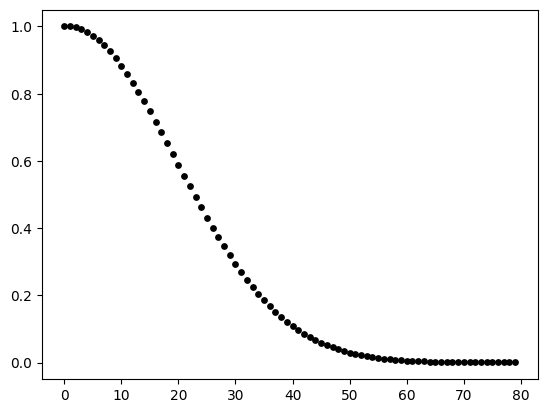

In [91]:
for i in range(80):
    plt.scatter(i, same_birthday(i), s=15, color='k')
plt.show()

In [92]:
#6.
def GetExperiments(N=1e5):

  freq = 0

  for i in range(int(N)):

    d1 = np.random.randint(1,7)
    d2 = np.random.randint(1,7)
    d3 = np.random.randint(1,7)
  
    if not(d1 == d2 == d3) and ((d1 == d2) or (d1 == d3) or (d2 == d3)):
      freq += 1
  return freq/N

In [93]:
print('Probabilidad de obtener un par al lanzar 3 dados: ', GetExperiments())

Probabilidad de obtener un par al lanzar 3 dados:  0.41785


In [94]:
#7.
def GetExperiments2(N=1e5):

  freq = 0

  for i in range(int(N)):

    d1 = np.random.randint(1,7)
    d2 = np.random.randint(1,7)
    d3 = np.random.randint(1,7)
    d4 = np.random.randint(1,7)
    d5 = np.random.randint(1,7)
    dados = [d1,d2,d3,d4,d5]
    
    if len(set(dados)) == 4:
      freq += 1
      
  return freq/N
print('Probabilidad de obtener un par al lanzar 5 dados: ', GetExperiments2())

def GetExperiments2(N=1e5):

  freq = 0

  for i in range(int(N)):

    d1 = np.random.randint(1,7)
    d2 = np.random.randint(1,7)
    d3 = np.random.randint(1,7)
    d4 = np.random.randint(1,7)
    d5 = np.random.randint(1,7)
    dados = [d1,d2,d3,d4,d5]
    
    if len(set(dados)) == 3:
      equal = False
      for i in set(dados):
        if dados.count(i)>2:
          equal = True
      if not equal:
        freq += 1      
        
  return freq/N
print('Probabilidad de obtener dos pares distintos al lanzar 5 dados: ', GetExperiments2())


Probabilidad de obtener un par al lanzar 5 dados:  0.46135
Probabilidad de obtener dos pares distintos al lanzar 5 dados:  0.23258


Probabilidad de obtener 4 de la misma cara:
- Numero de resultados posibles: $6^5=7776$
- 6 posibles opciones para el dado diferente y 5 posibles opciones para los dados iguales
- 5 formas de organizar los dados $\binom{5}{1}$
$\mathbb{P}=\frac{6x6x5}{7776}=\frac{150}{7776}=\frac{25}{1296}$

12. 
a. Considerando que $\epsilon_1>\epsilon_0$ (unicamente dos niveles de energia distintos) y $N = n_0 + n_1$ entonces el numero de configuraciones posibles esta dado por las permutaciones de $n_0$ y $n_1$:
$$
\Omega(N,n_0)=\frac{N!}{n_0!n_1!}
$$
(Vease adjunto Github)


/var/folders/d3/l9212dl52rq4bd3hyqq1g_380000gn/T/ipykernel_88732/327783374.py:2: RuntimeWarning: divide by zero encountered in log
  return -(x*np.log(x)+(1-x)*np.log(1-x))
/var/folders/d3/l9212dl52rq4bd3hyqq1g_380000gn/T/ipykernel_88732/327783374.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return -(x*np.log(x)+(1-x)*np.log(1-x))


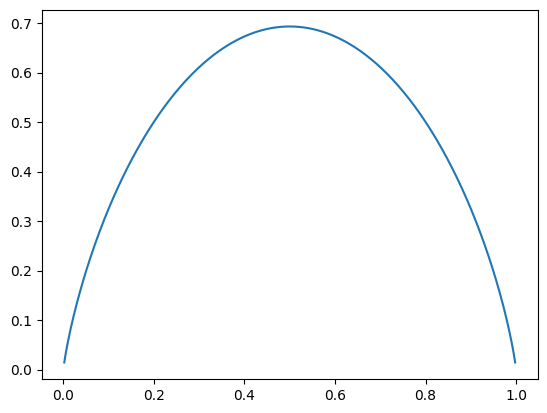

In [136]:
def S(x):
    return -(x*np.log(x)+(1-x)*np.log(1-x))
x = np.linspace(0., 1, 500)
plt.plot(x, [S(i) for i in x])

In [95]:
#EJERCICIOS METODO DE MONTECARLO
#6.
def C(k, n = 10000):
    P = []
    c = 0
    for i in range(n):
        x = np.random.uniform(0,1)
        P.append(x)
    
    for i in range(0,len(P)-k):
        c += P[i]*P[i+k]
    return c/len(P)
        

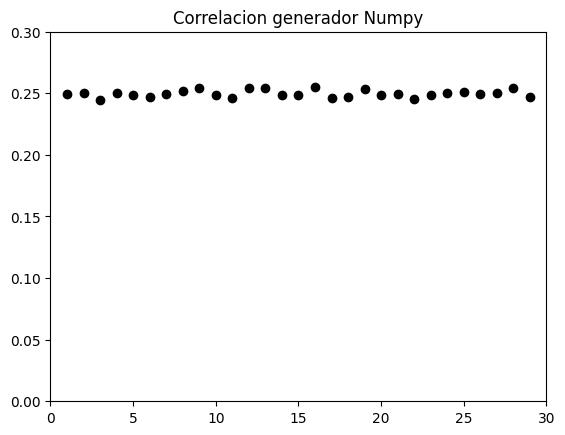

In [96]:
plt.xlim(right=30)
plt.ylim(top=0.3)
for i in range(1,30):
    plt.scatter(i, C(i, 10000), color='k')
plt.title('Correlacion generador Numpy')
plt.show()

In [97]:
def Getpoints(n):
    puntos = []
    total = []
    for i in range(n):
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-1,1)
        z = np.random.uniform(-1,1)
        total.append((x,y,z))
        if x**2 + y**2 + z**2 <= 1:
            puntos.append((x,y,z))
    return total, puntos

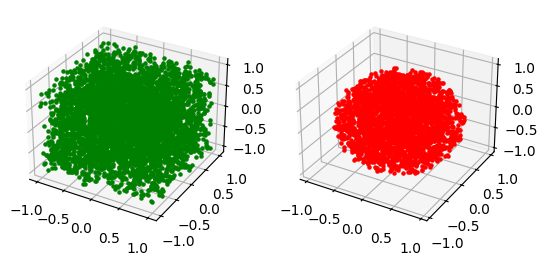

In [129]:

fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')
for i in total:
    ax1.scatter(i[0],i[1],i[2], color = 'g', s=5)
for i in puntos:
    ax2.scatter(i[0],i[1],i[2], color = 'r', s=5)
plt.show()

In [99]:
def Ixx(puntos):
    I = 0
    for i in puntos:
        I += i[1]**2 + i[2]**2
    return I/len(puntos)
def Iyy(puntos):
    I = 0
    for i in puntos:
        I += i[0]**2 + i[2]**2
    return I/len(puntos)
def Izz(puntos):
    I = 0
    for i in puntos:
        I += i[0]**2 + i[1]**2
    return I/len(puntos)

total, puntos = Getpoints(5000)
print(f'Inercia esfera Ixx = {Ixx(puntos)}, Iyy = {Iyy(puntos)}, Izz = {Izz(puntos)}.')

#Producto de inercia Ixy
def Ixy(puntos):
    I = 0
    for i in puntos:
        I += (i[0])*(i[1])
    return -I/len(puntos)
print(f'Producto de inercia Ixy esfera {Ixy(puntos)}.')

#Los movimientos de una esfera por los ejes x,y,z preservan simetria pues ambos son los mismos entre ellos y tambien bajo la distribucion de puntos
#pues al generar otro conjunto de puntos en la esfera, esta cantidad no varia tanto.

Inercia esfera Ixx = 0.3984912005271985, Iyy = 0.39351308471283647, Izz = 0.3992313273949776.
Producto de inercia Ixy esfera 0.0074521750547675075.


In [100]:
#9.

def Beta(x,a,b):
    
    return (gamma(a+b)/(gamma(a)*gamma(b)))*(x**(a-1))*(1-x)**(b-1)

def GetArea(n,a,b):
    freq = 0
    for i in range(n):
        dot_x = np.random.uniform(0.,1)
        dot_y = np.random.uniform(0.,2.11)
        if dot_y < Beta(dot_x, a, b):
            freq += 1
    return (freq/n)*2.11

print('Area: ', GetArea(1000000,2.,4.))

Area:  1.0003277899999998


media notas:  75.34177215189874
mediana notas:  75.0


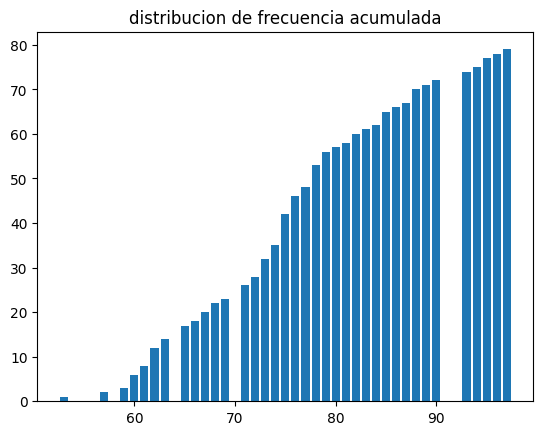

In [101]:
#EJERCICIOS MUESTREO
#7.
data = pd.read_csv('Matematicas.txt')
data = np.array(data.T)
data = data[0]
print('media notas: ', np.mean(data))
print('mediana notas: ', np.percentile(data,50))

x = np.sort(data)
y = np.arange(1, len(x)+1)
plt.bar(x,y)
plt.title('distribucion de frecuencia acumulada')
plt.show()


<BarContainer object of 79 artists>

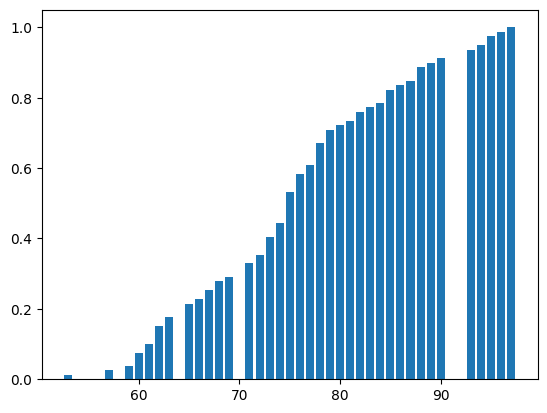

In [102]:
y_dist = np.arange(1, len(x)+1)/len(x)
plt.bar(x,y_dist)

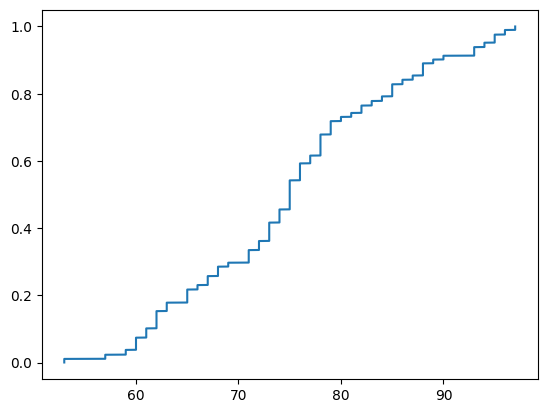

In [103]:
def Bootstrapping(n=10000):
    sample = []
    for i in range(n):
        sample.append(np.random.choice(data))
    return sample

new_data = np.sort(Bootstrapping())

y_new = np.arange(1, len(new_data)+1)/len(new_data)
plt.plot(new_data,y_new)
#plt.title('distribucion de frecuencia acumulada')
plt.show()


In [127]:
#FIT GAUSSIANO
import scipy.optimize as spo

def Likelihood(p,x):
  mean,std = p
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))

def JointLikelihood(p,x):
  return -np.sum(np.log(Likelihood(p,x)))

p0 = np.array([75.34,1.178])
result = spo.minimize(JointLikelihood,p0, args= data)
R = result.x

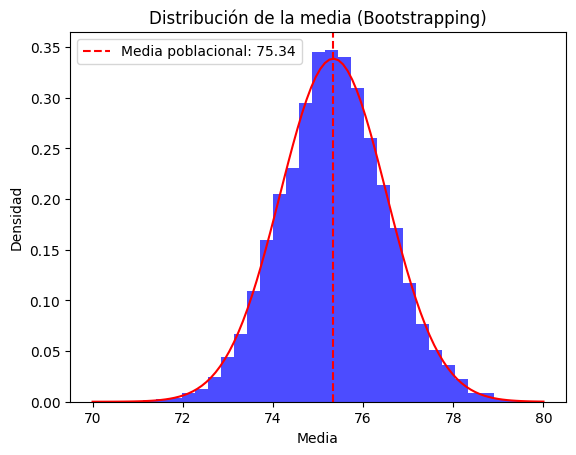

In [128]:
import random
def mean(data, it=1000):

    media = []
    n = len(data)
    
    for i in range(it):
        muestra = random.choices(data, k=n)
        media.append(np.mean(muestra))
    
    return media

def bootstrapping(data, it=1000):

    media = np.mean(data)
    
    medias_b = mean(data, it)
    
    plt.hist(medias_b, bins=30, alpha=0.7, color="blue", density=True)
    plt.axvline(media, color="red", linestyle="--", label=f"Media poblacional: {media:.2f}")
    plt.xlabel("Media")
    plt.ylabel("Densidad")
    plt.title("Distribución de la media (Bootstrapping)")
    plt.legend()
    x = np.linspace(70,80,100)
    plt.plot(x,Likelihood(p0,x),color='r')
    plt.show()
    
    return np.mean(medias_b), np.std(medias_b)
    
m, std = bootstrapping(data, 10000)


In [151]:
#11. a)
from scipy.stats import gamma, norm, uniform
N = 10**4  
a = np.array([1, 2, -1])

X1 = gamma(a=2, scale=3).rvs(N)
X2 = norm(loc=5, scale=2).rvs(N)
X3 = uniform(loc=0, scale=10).rvs(N)

X = a[0] * X1 + a[1] * X2 + a[2] * X3

In [152]:
E_X = np.mean(X)
Var_X = np.var(X)

In [156]:
#Coeficientes de Pearson
p12 = np.corrcoef(X1, X2)[0, 1]
p13 = np.corrcoef(X1, X3)[0, 1]
p23 = np.corrcoef(X2, X3)[0, 1]